In [13]:
import os 
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
from datetime import date, timedelta

In [8]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'NIO']

In [9]:
# We would like all for past 60 days
start_date = (date.today()-timedelta(days=30)).isoformat()
end_date = date.today().isoformat()

In [10]:
data_provider = 'iex-tops' # Price and volume data from IEX

In [11]:
end_date

'2022-09-11'

In [24]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = pdr.get_data_yahoo("AAL", start_date, end_date)

In [25]:
print(panel_data)

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2022-08-12  15.29  15.03  15.16  15.25  21151000      15.25
2022-08-15  15.55  15.25  15.27  15.33  18364000      15.33
2022-08-16  15.71  15.11  15.30  15.50  23668500      15.50
2022-08-17  15.29  14.78  15.23  14.96  28352800      14.96
2022-08-18  15.02  14.73  14.98  14.84  19271200      14.84
2022-08-19  14.57  13.96  14.50  14.17  31593300      14.17
2022-08-22  13.92  13.61  13.78  13.71  25120700      13.71
2022-08-23  13.93  13.59  13.78  13.82  25500100      13.82
2022-08-24  14.05  13.77  13.84  13.99  17825100      13.99
2022-08-25  14.46  14.09  14.17  14.42  22167800      14.42
2022-08-26  14.54  13.71  14.41  13.74  23177500      13.74
2022-08-29  13.71  13.45  13.51  13.51  21391200      13.51
2022-08-30  13.68  13.20  13.61  13.33  25076800      13.33
2022-08-31  13.53  12.96  13.49  12.99  27923800      12.99
2022-09-01  12.95  12.50  12.87  12.93  

In [30]:
close = panel_data['Close']

In [31]:
close

Date
2022-08-12    15.25
2022-08-15    15.33
2022-08-16    15.50
2022-08-17    14.96
2022-08-18    14.84
2022-08-19    14.17
2022-08-22    13.71
2022-08-23    13.82
2022-08-24    13.99
2022-08-25    14.42
2022-08-26    13.74
2022-08-29    13.51
2022-08-30    13.33
2022-08-31    12.99
2022-09-01    12.93
2022-09-02    12.99
2022-09-06    13.22
2022-09-07    13.89
2022-09-08    13.96
2022-09-09    14.19
Name: Close, dtype: float64

In [32]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

In [33]:
close = close.reindex(all_weekdays)

In [34]:
close = close.fillna(method='ffill')

In [35]:
print(all_weekdays)

DatetimeIndex(['2022-08-12', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09'],
              dtype='datetime64[ns]', freq='B')


In [36]:
close.head(10)

2022-08-12    15.25
2022-08-15    15.33
2022-08-16    15.50
2022-08-17    14.96
2022-08-18    14.84
2022-08-19    14.17
2022-08-22    13.71
2022-08-23    13.82
2022-08-24    13.99
2022-08-25    14.42
Freq: B, Name: Close, dtype: float64

In [38]:
msft = close.loc[:]

In [39]:
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=10).mean()

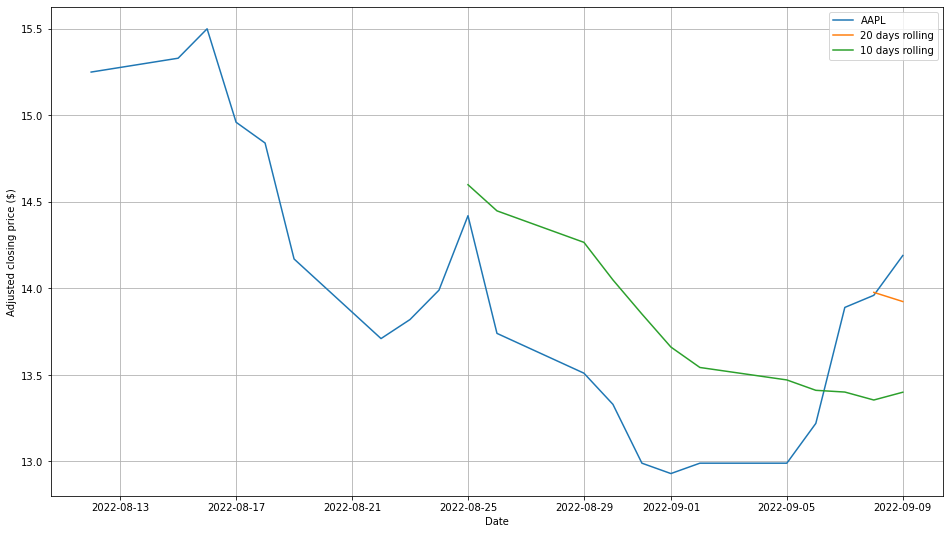

In [40]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='AAPL')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='10 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()